In [1]:
import numpy as np
import matplotlib.pyplot as plt
from lds import LDS

import os, sys
parentPath = os.path.abspath("..")
if parentPath not in sys.path:
    sys.path.insert(0, parentPath)
import utils

A 2D surface parallel to earth. Noisy observations are positions $x_{x}$, $x_{y}$. Hidden variables are true position values and velocities $v_{x}$, $v_{y}$. We assume constant velocity for this example.

$x_{x}(t+1) = x_{x}(t) + v_{x}(t) + \eta_{x_{x}}(t)$

$v_{x}(t+1)$ = $v_{x}(t) + \eta_{v_x}(t)$

$x_{y}(t+1) = x_{y}(t) + v_{y}(t) + \eta_{x_{y}}(t)$

$v_{y}(t+1)$ = $v_{y}(t) + \eta_{v_y}(t)$

In [2]:
A = np.array([[1,0,1],[0,1,1],[0,0,1]])
B = np.array([[1,0,0],[0,1,0]])
pi_m = np.array([0,0,1])
S = 3
O = 2
pi_s = np.eye(S)
E_h = np.eye(S)*0.1
E_h[S-1,S-1] = 10**-5
E_o = np.eye(O)*0.2

In [3]:
lds = LDS(A,B,pi_m,pi_s,S,O,E_h,E_o)

In [4]:
states,observations = lds.generate_data(40)

In [5]:
print states

[array([-0.10934939,  1.71697616,  2.33578539]), array([2.12667337, 3.75527972, 2.33599903]), array([4.60854831, 6.25070429, 2.34174424]), array([7.07743026, 8.15287569, 2.34538043]), array([ 9.36746768, 11.07561982,  2.34631973]), array([12.73154694, 13.37494377,  2.35162467]), array([15.35149521, 15.69736741,  2.35676171]), array([17.66354543, 18.02539398,  2.35138544]), array([20.06009122, 20.46605162,  2.35374024]), array([22.83524646, 22.76452068,  2.35569998]), array([25.57242046, 25.91728583,  2.35669233]), array([27.65101581, 28.22555606,  2.34929244]), array([30.21054727, 30.83847311,  2.35358428]), array([32.56760841, 32.976892  ,  2.35415325]), array([34.57466677, 35.2540206 ,  2.34642517]), array([36.87385335, 37.73429771,  2.34496339]), array([39.17405809, 40.04004493,  2.34660696]), array([41.04623771, 41.9466349 ,  2.34757082]), array([42.99200721, 44.26261473,  2.3462378 ]), array([46.10929563, 46.9818045 ,  2.34228054]), array([49.03271158, 49.25252724,  2.34024371]), 

In [6]:
print observations

[array([-0.25057164,  1.5273371 ]), array([2.14427105, 3.49910128]), array([4.65178111, 6.69428508]), array([7.97692255, 8.12936793]), array([ 9.46998232, 11.72673282]), array([12.0676195, 13.597832 ]), array([15.06260951, 15.42986413]), array([17.70037933, 17.17655886]), array([20.67420684, 20.33041306]), array([23.426     , 22.46655522]), array([25.48149969, 25.45404298]), array([27.50269039, 28.39423421]), array([30.34187347, 30.45325995]), array([32.23874105, 32.75960055]), array([34.85337235, 35.401963  ]), array([37.16707647, 38.34175034]), array([38.70060608, 39.83710393]), array([40.38140517, 41.70757716]), array([42.41914656, 43.74827729]), array([46.06602707, 47.51680611]), array([49.0351546 , 49.36198997]), array([50.65911737, 51.38356948]), array([53.62157243, 54.44432396]), array([55.38019809, 55.31731181]), array([57.96601244, 58.99074363]), array([60.80850919, 60.38094017]), array([61.93550909, 61.96598126]), array([66.38440599, 64.51768484]), array([68.977926  , 66.6666

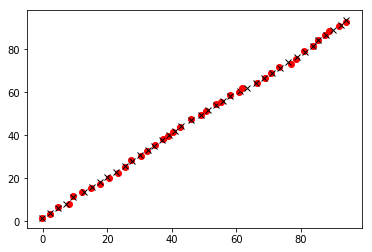

In [7]:
for obs, state in zip(observations, states):
    plt.plot(obs[0],obs[1],'ro')
    plt.plot(state[0],state[1],'kx')
plt.show()

In [8]:
f,F = lds.filtering(observations)

In [9]:
print f

[array([[-0.08352388],
       [ 0.50911235],
       [ 0.        ]]), array([[9.29187771e-01],
       [1.86827581e+00],
       [1.42295430e-04]]), array([[2.74765026e+00],
       [4.22561584e+00],
       [6.98815168e-04]]), array([[5.34809685e+00],
       [6.16717813e+00],
       [1.68626699e-03]]), array([[7.40807491e+00],
       [8.94493832e+00],
       [3.17846402e-03]]), array([[9.74017316e+00],
       [1.12737123e+01],
       [5.05780153e-03]]), array([[1.24057450e+01],
       [1.33561953e+01],
       [7.43074694e-03]]), array([[1.50591467e+01],
       [1.52724785e+01],
       [1.01581165e-02]]), array([[1.78751057e+01],
       [1.78098763e+01],
       [1.38753269e-02]]), array([[2.06612029e+01],
       [2.01488665e+01],
       [1.79287277e-02]]), array([[2.30844935e+01],
       [2.28145968e+01],
       [2.24420035e-02]]), array([[25.30942216],
       [25.62024567],
       [ 0.02738174]]), array([[27.84436091],
       [28.05546591],
       [ 0.03272967]]), array([[30.06297896],
   

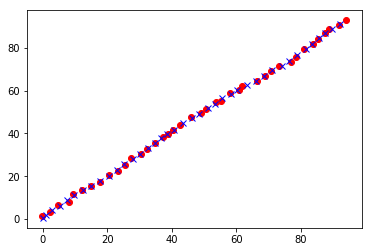

In [10]:
for i in range(len(observations)):
    plt.plot(observations[i][0],observations[i][1],'ro')
    plt.plot(f[i][0],f[i][1],'bx')
plt.show()

In [11]:
h,H = lds.smoothing(observations)

In [12]:
print h

[array([[1.11033599],
       [1.90356234],
       [0.01631066]]), array([[2.91743661],
       [4.01154815],
       [0.03224899]]), array([[5.12705369],
       [6.3916911 ],
       [0.04774231]]), array([[7.58979363],
       [8.63602362],
       [0.06277918]]), array([[ 9.87399791],
       [11.14871281],
       [ 0.07735221]]), array([[12.37477415],
       [13.38695614],
       [ 0.09146927]]), array([[15.04323539],
       [15.53386919],
       [ 0.10512498]]), array([[17.71565562],
       [17.74643081],
       [ 0.1183147 ]]), array([[20.40889395],
       [20.25710834],
       [ 0.13100885]]), array([[22.98216025],
       [22.74381792],
       [ 0.14322414]]), array([[25.34571232],
       [25.38136451],
       [ 0.15496873]]), array([[27.65310581],
       [27.99430698],
       [ 0.16625288]]), array([[30.0469819 ],
       [30.41856073],
       [ 0.17708898]]), array([[32.30423925],
       [32.83629192],
       [ 0.1874934 ]]), array([[34.60464134],
       [35.30276445],
       [ 0.1974

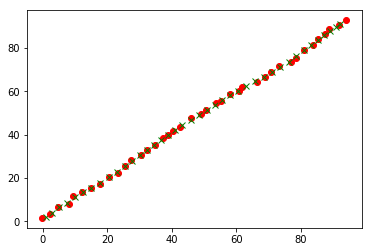

In [13]:
for i in range(len(observations)):
    plt.plot(observations[i][0],observations[i][1],'ro')
    plt.plot(h[i][0],h[i][1],'gx')
plt.show()

In [19]:
A, B, pi_m, pi_s, E_h, E_o, h_list, H_list = lds.EM(observations,estimate=['A','B','pi_m','pi_s'],num_iterations=20)

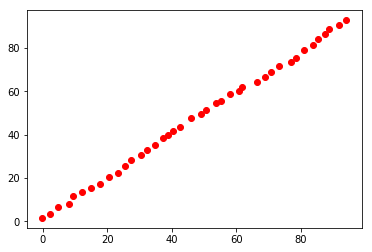

In [20]:
for i in range(len(observations)):
    plt.plot(observations[i][0],observations[i][1],'ro')
    plt.plot(h_list[i][0],h_list[i][2],'kx')
plt.show()

In [16]:
A

array([[-0.10163714,  1.44169057,  0.60448743, -0.28445375],
       [-0.64076684,  1.21413419,  0.36423205, -0.22291894],
       [-0.27808856,  1.1457207 ,  1.05335391,  0.9234373 ],
       [ 0.11146348,  0.6274399 , -0.09253864,  0.91754798]])